In [1]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)    # reproducible

In [2]:
# Data
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())
# y = torch.sin(x) + 0.2*torch.rand(x.size())

# torch can only train on Variable, so convert them to Variable
x = Variable(x)
y = Variable(y)

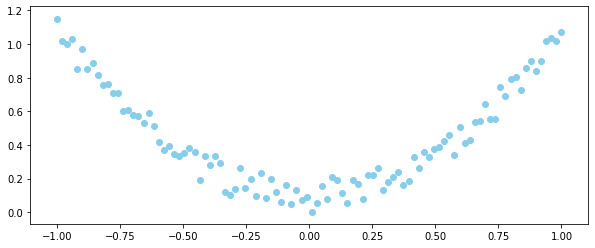

In [3]:
# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "skyblue")
plt.show()

In [4]:
# Define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [5]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
# print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.2)

criterion = torch.nn.MSELoss()

In [6]:
epochs = 5000
lossV = []

# Train the network
for t in range(epochs):  
    prediction = net(x)     # input x and predict based on x

    loss = criterion(prediction, y)     # must be (1. nn output, 2. target)
    lossV.append(loss.item())

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

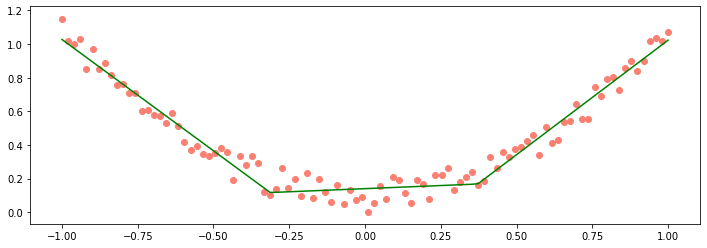

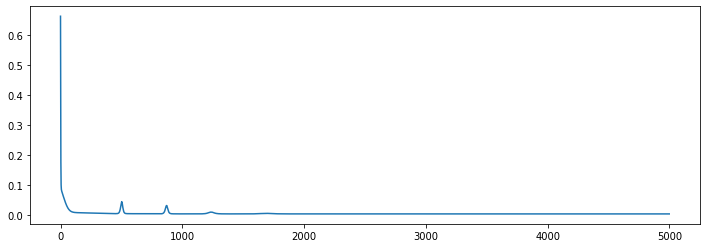

In [7]:
# Plot and show learning process
plt.figure(figsize=(12,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "salmon")
plt.plot(x.data.numpy(), prediction.data.numpy(), 'g-')
plt.show()

plt.figure(figsize=(12,4))
plt.plot(range(epochs), lossV)
plt.show()